In [110]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# df shows the dataset which contains 4177 rows and 9 columns
# The main important thing here is that our target column is continuos 
# So we are building the model to predict the no. of rings in the Abalone 
# and here the target column "Rings" has continuous values and hence its a Regression problem. 
# We need to choose the Regression models to solve this problem

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [7]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [8]:
#df.tail() displays the last 5 rows from the dataset(indexed from 4172-4176), so from here we can draw conclusion that we have 4177 rows in total(0-4176)

In [9]:
df.shape

(4177, 9)

In [10]:
# No. of rows - 4177
# No. of columns - 9

In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
# So there are 9 columns and its headers are displayed when df.columns is executed

In [13]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [14]:
# The sex column is of character datatype and is not identified by Python hence it is displayed as object
# Rest columns except for Rings(target column) has float values and is of float datatype
# The target column Rings has datatype value as int

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
# The info that we can infer from df.info() is as below
# Total entries are 4177(0-4176)
# Total data columns is 9
# Each data column contains no null values, hence the non-null count is 4177 for all the 9 columns
# All the independent variables have float values, hence datatype is float except for sex column, its datatype is character and
# hence displayed as object.
# The dependent variable or the target column has integer values and hence the datatype is integer
# This also gives info on the memory usage

In [17]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [18]:
# This shows that there are no null values in our dataset

In [19]:
np.where(pd.isnull(df)) #This is to find the location if incase null values are present in the dataset

(array([], dtype=int64), array([], dtype=int64))

In [20]:
# This proves that there are no missing entry or a NaN entry in our dataset as already verified in df.isnull().sum()

In [21]:
# Trying to find the duplicate rows in our dataset
duplicate = df.duplicated()
print(duplicate.sum())     # gives no. of duplicate rows in the dataset
df[duplicate]              # prints the duplicate rows in the dataset

0


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [22]:
# This  proves that there is no single duplicated row present in the dataset

In [23]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range
# We can observe that the all features are numerical except for the column Sex
# Sex column is categorical and is of character datatype
# All features are close to normality
# Min value for height is zero

In [25]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [26]:
# These are the 3 categories in the Sex column which is "Male - M","Female - F" and "Infant - I".

In [27]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [28]:
# We find that we have 1528 belonging to males, 1342 belonging to Infants and 1307 belonging to Female Abalone

In [29]:
cat_df=['Sex']
num_df = []
for i in df:
    if (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Other >', i)
print("Categorical Columns : ",cat_df)
print()
print("Continous Columns : ",num_df)

Other > Sex
Categorical Columns :  ['Sex']

Continous Columns :  ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [30]:
# All other columns except for 'Sex' are continuous columns

# Uni-Variant Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

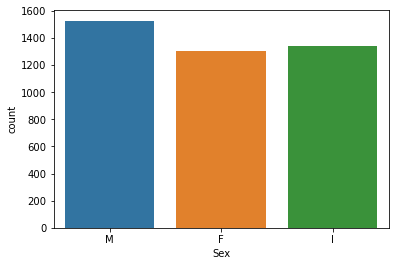

In [31]:
sns.countplot(df["Sex"])

In [32]:
# Graphical representation of distribution of Abalones in Sex column using the countplot

In [33]:
# The values in the "Sex" column are of String datatype so we need to convert them into numeric values

# Data Manipulation

In [34]:
# Firstly importing Label Encoder
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
df["Sex"] = labelencoder.fit_transform(df["Sex"])

In [35]:
# Using LabelEncoder to transform the String values into numeric which is understandable by PYTHON

In [36]:
df["Sex"]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [37]:
# Now that the character values M, F and I are converted to numerical values(0, 1 and 2).

In [38]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [39]:
# These are the various values associated with the Abalone rings 

In [40]:
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [41]:
# This shows the count of Abalones having various no. of rings specified 

<AxesSubplot:xlabel='Rings', ylabel='count'>

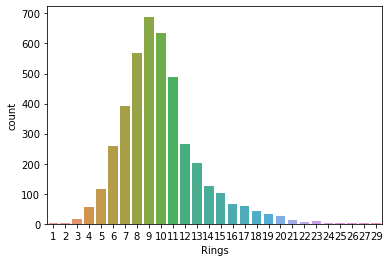

In [42]:
sns.countplot(df["Rings"])

In [43]:
# This plot shows the distribution of abalones over the range of values of rings
# Larger set of Abalones have the ring value of 9


# Bi-Variate Analysis

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

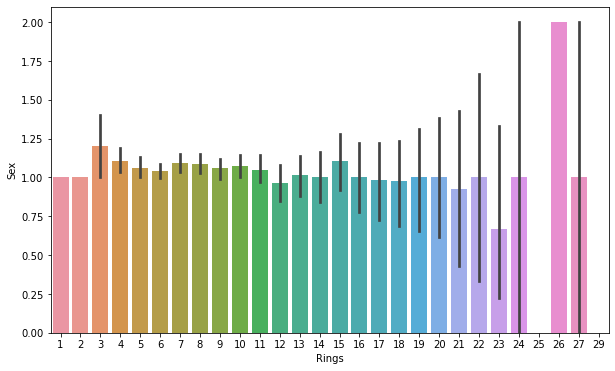

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Sex', data = df)

In [45]:
# We dont see that the sex gives any specification for the column Rings

<AxesSubplot:xlabel='Rings', ylabel='Length'>

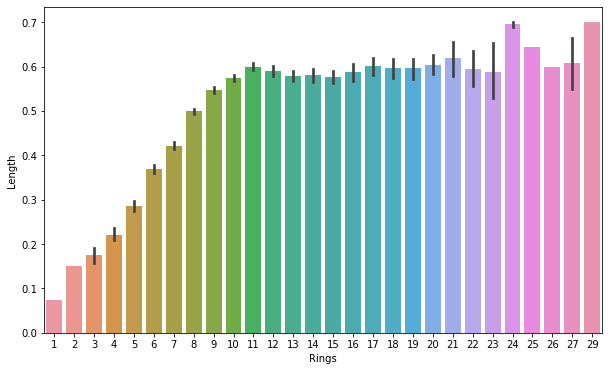

In [46]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Length', data = df)

In [47]:
# There is an increase in length with the increase in no. of rings

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

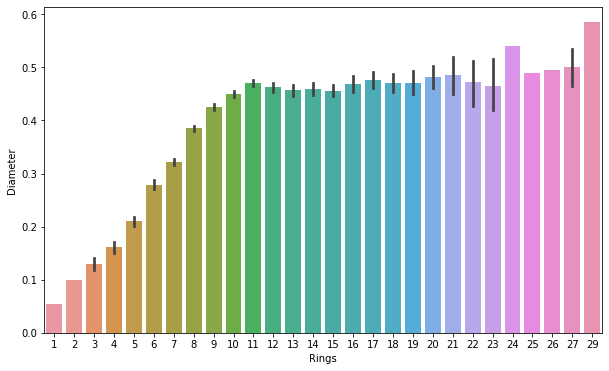

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Diameter', data = df)

In [49]:
# There is an increase in diameter with the increase in no. of rings, it's proportional to the previous analysis lenght

<AxesSubplot:xlabel='Rings', ylabel='Height'>

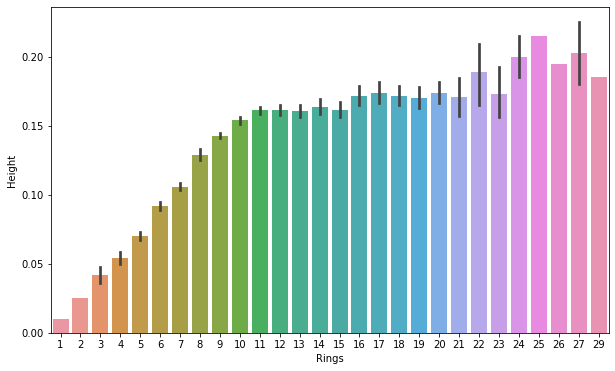

In [50]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Height', data = df)

In [51]:
# Even the height is proportional to length and Diameter, no. of rings increases with increase in the height

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

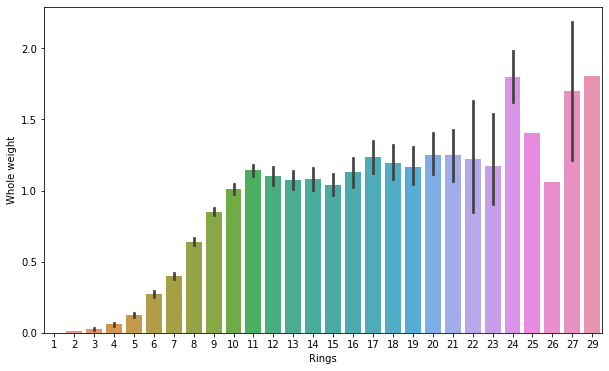

In [52]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Whole weight', data = df)

In [53]:
# We see that as the no. of rings increases , there is an increase with the weight of Abalone

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

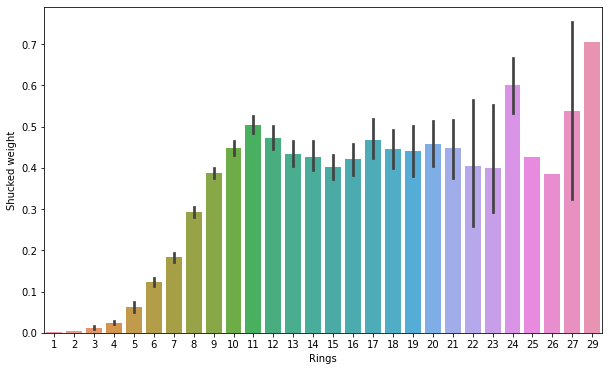

In [54]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Shucked weight', data = df)

In [55]:
# This is very much proportional to the "Whole weight", seeing the same result as earlier

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

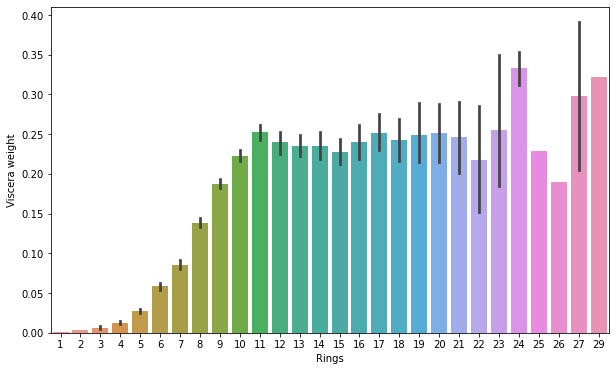

In [56]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Viscera weight', data = df)

In [57]:
# This is very much proportional to the "Whole weight" and "Shucked weight", seeing the same result as earlier

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

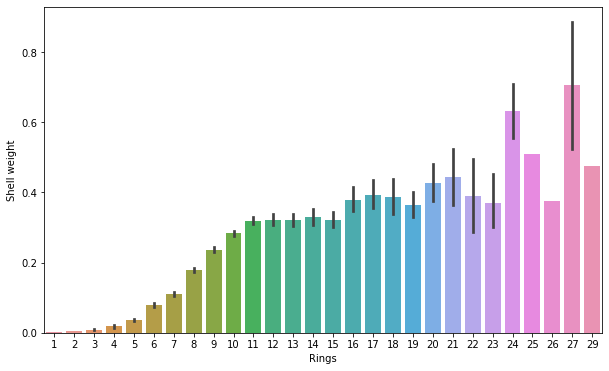

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Shell weight', data = df)

In [59]:
# This is very much proportional to the "Whole weight" , "Viscera weight" and "Shucked weight", seeing the same result as earlier

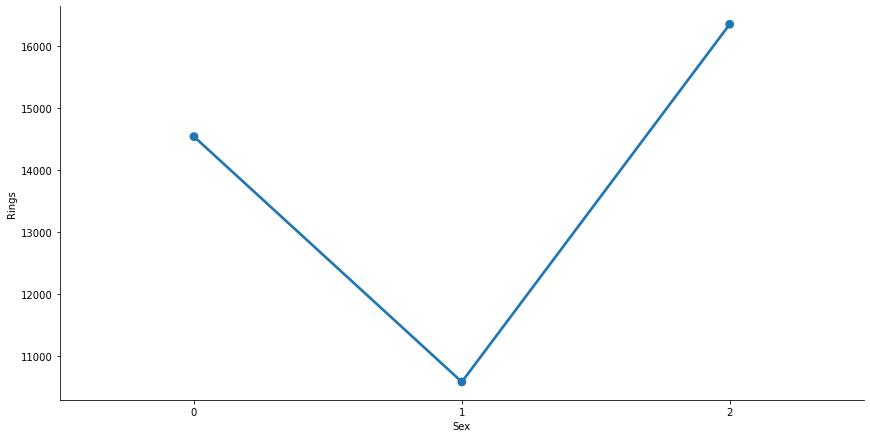

In [60]:
# Bivariate Analysis of categorical variables with Target Variable.
df_cat = pd.DataFrame(df.groupby(['Sex'], as_index=False).sum())
sns.catplot(x='Sex', y="Rings", data=df_cat.reset_index(), kind="point", height=6, aspect=2)

In [61]:
# This is the bi-variate analysis of the categorical column "Sex" with the target column "Rings".

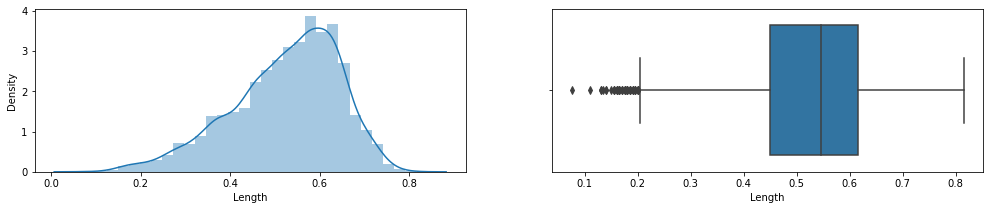

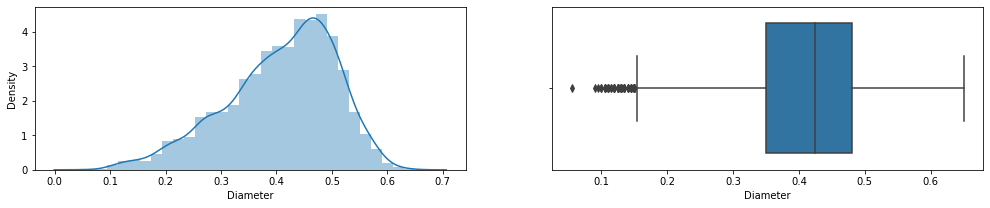

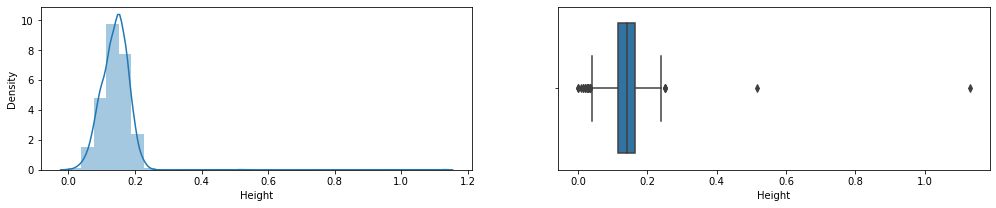

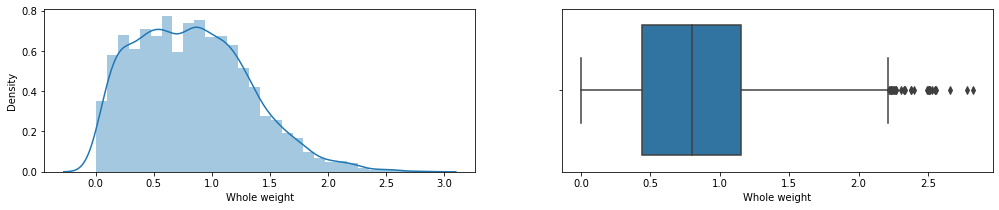

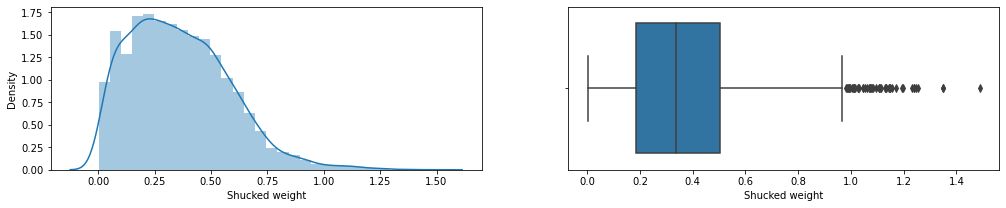

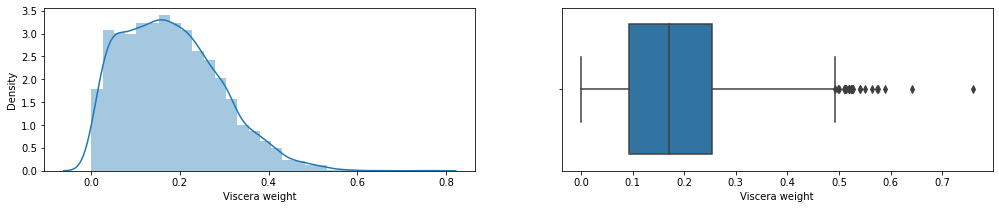

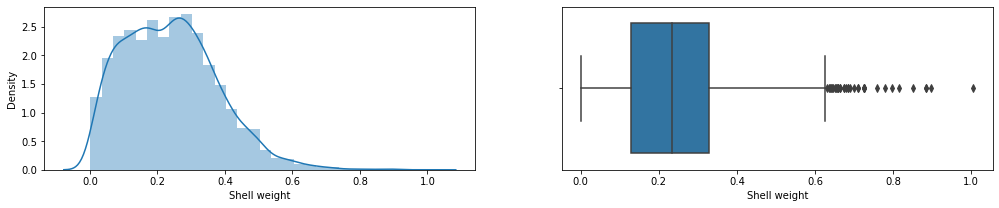

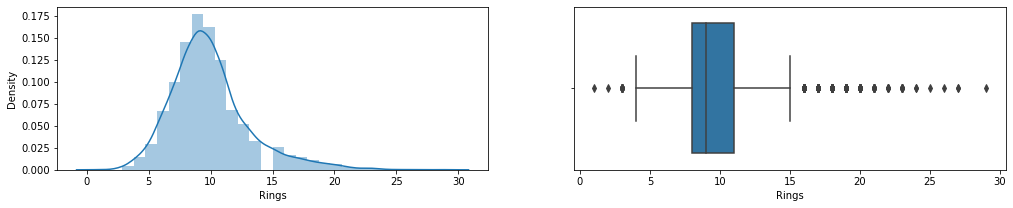

In [62]:
#Univariate analysis for num_df
skewness, skew_name = [], []
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)

In [63]:
# We see that we have both outliers and skewness present in our dataset
# Let's try to remove them

# Multi-variate Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Sex'),
  Text(0, 1.5, 'Length'),
  Text(0, 2.5, 'Diameter'),
  Text(0, 3.5, 'Height'),
  Text(0, 4.5, 'Whole weight'),
  Text(0, 5.5, 'Shucked weight'),
  Text(0, 6.5, 'Viscera weight'),
  Text(0, 7.5, 'Shell weight'),
  Text(0, 8.5, 'Rings')])

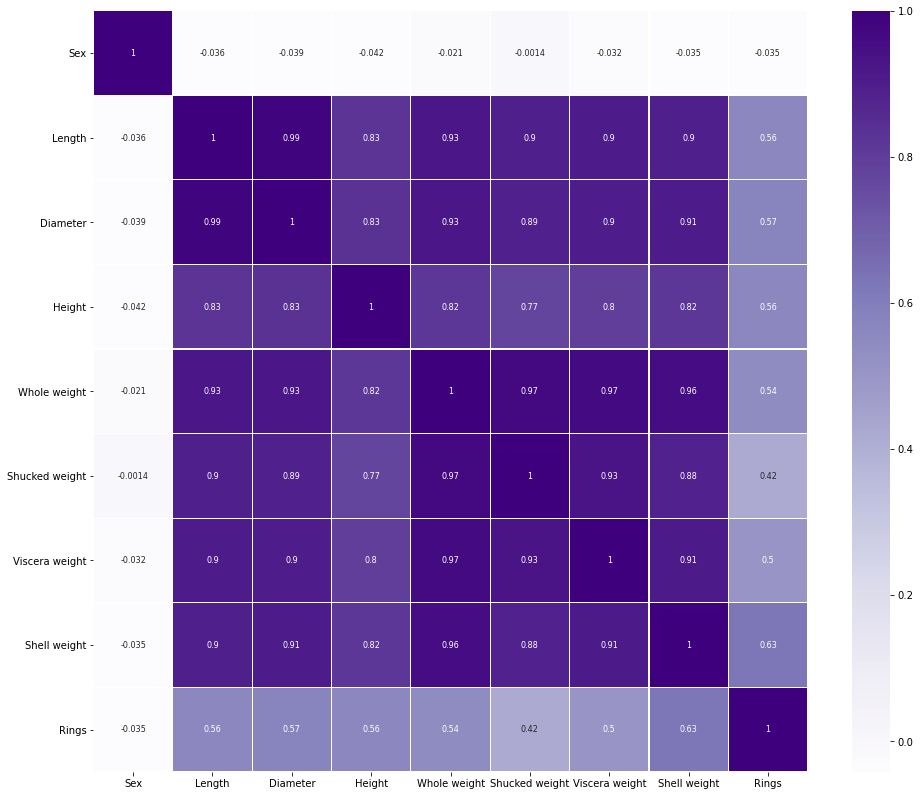

In [64]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

In [65]:
# From this heatmap we have got the correlation values and we can see that the column "Height" and " Shell weight" 
# has high positive correlation with the target column compared to all other columns
# Almost almost all the features are nearly equally correlated with the target column since the length, diameter and height are
# correlated to each other
# Among the weighted features, Shell weight has more correlation with the target column compared to Shucked weight and Viscera weight
# Among the weighted features, Viscera weight has less correlation with the target column compared to Shucked weight and Whole weight
# We can see that the column Sex has nearly zero(-0.033) correlation with the target column

In [66]:
cor = df.corr()
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [67]:
# same observations as above as in the heatmap
# Least correlated value is 0.33 of Sex column with the target column

In [68]:
# Representing which columns have positive and negative correlations with the target column

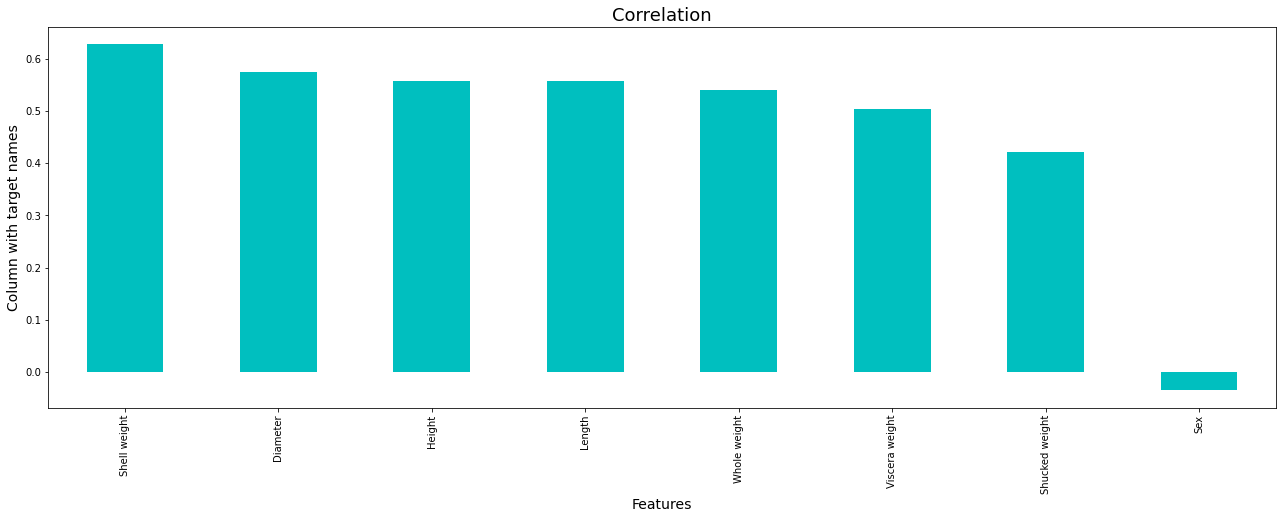

In [69]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(["Rings"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [70]:
# We can clearly see through the graphical representation that all the feature columns have positive correlation with the target 
# column except for the Sex column.

# Data manipulation

In [71]:
# we can actually drop the Sex feature from the dataset, since it is not very significant in predicting the target label
df.drop('Sex', axis = 1,inplace = True)

In [72]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [73]:
# We can see that now we have dropped the column "Sex" and have 8 columns.

In [74]:
 df['age'] = df['Rings']+1.5

In [75]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [76]:
# We can see that now the columns are 9 and have added the column "age" (Rings+1.5), so lets drop the column Rings.

In [77]:
df.drop('Rings', axis = 1, inplace = True)

In [78]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [79]:
# Now the target column is age and we are predicting the age of Abalone here
# The column no. is updated to 8 again since we have dropped column "Rings".

In [80]:
# Since the outliers are present we will have the presence of skewness too, let's check for it
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

In [81]:
# Skewness can be in a range of -0.5 to +0.5 
# So here the column height has very high skewness
# As we can see, almost all the columns have skewness present in them.

# Considering to remove the outliers

In [82]:
# Let's firstly check the shape of our dataset
df.shape

(4177, 8)

In [83]:
# Before removing outliers we have 4177 rows and 8 columns present in our dataset

In [84]:
#applying zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [85]:
df_new_z=df[(z<3).all(axis=1)] 
df_new_z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [86]:
df_new_z.shape  # info of data after removing outliers

(4027, 8)

In [87]:
# We have lost few rows, now the no. of rows is 4027
# Let's calculate for the dataloss
Dataloss=((4177-4027)/4177)*100




In [88]:
Dataloss

3.5910940866650707

In [ ]:
# So here the dataloss is only 3.59% which is totally acceptable

In [ ]:
# Let's check for skewness

In [89]:
df_new_z.skew()   # skewness is reduced comparitively

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
age               0.725464
dtype: float64

# Separating the columns into features and target

In [90]:
X = df_new_z.drop("age",axis=1)
y=df_new_z["age"]

# Scaling the data using Min-Max Scaler

In [93]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30) # Splitting data into test and train set

In [95]:
lr.fit(X_train,y_train) # Fitting the training data to our Linear Regression model

LinearRegression()

In [96]:
pred_test=lr.predict(X_test)   # performing the predictions on test

In [97]:
print(r2_score(y_test,pred_test))

0.5274127329311151


In [ ]:
# So here from the Linear Regression model we achieved 52.74% using r2_score as our evaluation model

In [99]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.41472280082211943

In [ ]:
# So the cross-validation score is 41.47%

In [ ]:
# Difference between r2_score and cv is 11.27%

# Regularization

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [102]:
# By performing GridSearchCV on Lasso model we found the best parameters alpha=0.0001 and random_state=0

In [103]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.5270263041560559

In [104]:
# I have fit the best paramters into the Lasso regression model and fetched the accuracy 52.70%

In [105]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.41465013835064307

In [106]:
# The cross validation score achieved is 41.46%

In [107]:
from sklearn.linear_model import Ridge

In [112]:
#importing ML models from scikit-learn
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [113]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1)
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)]

In [114]:
results

,MAE,MSE,R2-score
Linear Regression,1.470,3.812,0.527
Decision Tree,1.963,7.069,0.123
Random Forest,1.391,3.585,0.555
Support Vector Machines,1.428,4.038,0.499
K-nearest Neighbors,1.784,6.156,0.237


The RANDOM FOREST is the best model because we see that Random forest the minimum error compared to all other models and
that the R2- score is comparatively high (nearing to 1)

In [117]:
Final_mod = RandomForestRegressor()

# Saving the model

In [118]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']